<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [3]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [3]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [4]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


In [4]:
import pandas as pd
# Specify the file path
file_path = "dataset.csv"
# Read the CSV file into a Pandas data frame
df = pd.read_csv(file_path)
df.head()
# Assuming the first rows of the file are the headers, you don't need to specify any additional parameters
# Additional details:
# - The `pd.read_csv()` function is used to read a CSV file into a Pandas data frame.
# - By default, it assumes that the first row of the file contains the headers for the data.
# - If your file doesn't have headers, you can specify `header=None` as an additional parameter.
# - You can also specify other parameters, such as `sep` to specify the delimiter used in the file.
# - Make sure you have the Pandas library installed in your Python environment before running this code.

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [6]:
# 2. Generate the statistical description of all the features
description = df.describe(include='all')
print(description)

        Unnamed: 0 Manufacturer    Category   Screen         GPU          OS  \
count   238.000000          238  238.000000      238  238.000000  238.000000   
unique         NaN           11         NaN        2         NaN         NaN   
top            NaN         Dell         NaN  Full HD         NaN         NaN   
freq           NaN           71         NaN      161         NaN         NaN   
mean    118.500000          NaN    3.205882      NaN    2.151261    1.058824   
std      68.848868          NaN    0.776533      NaN    0.638282    0.235790   
min       0.000000          NaN    1.000000      NaN    1.000000    1.000000   
25%      59.250000          NaN    3.000000      NaN    2.000000    1.000000   
50%     118.500000          NaN    3.000000      NaN    2.000000    1.000000   
75%     177.750000          NaN    4.000000      NaN    3.000000    1.000000   
max     237.000000          NaN    5.000000      NaN    3.000000    2.000000   

          CPU_core  Screen_Size_cm  CPU

In [10]:
# Find columns with missing values
missing_columns = df.columns[df.isnull().any()]

# Print columns with missing values
print("Columns with missing values:", missing_columns)

Columns with missing values: Index(['Screen_Size_cm', 'Weight_kg'], dtype='object')


In [12]:
# Replace missing values in the 'Screen_Size_cm' column with the most frequent value
most_frequent_value = df['Screen_Size_cm'].mode()[0]
df['Screen_Size_cm'].fillna(most_frequent_value, inplace=True)
# Replace missing values in the 'Weight_kg' column with the mean value
mean_value = df['Weight_kg'].mean()
df['Weight_kg'].fillna(mean_value, inplace=True)

<ipython-input-12-b6a6c379ec69>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Screen_Size_cm'].fillna(most_frequent_value, inplace=True)
<ipython-input-12-b6a6c379ec69>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [14]:
# Change the data type of 'Screen_Size_cm' and 'Weight_kg' to float
df['Screen_Size_cm'] = df['Screen_Size_cm'].astype(float)
df['Weight_kg'] = df['Weight_kg'].astype(float)

In [15]:
# Convert 'Screen_Size_cm' from centimeters to inches and modify the attribute name
df['Screen_Size_inch'] = df['Screen_Size_cm'] * 0.393701
df.drop('Screen_Size_cm', axis=1, inplace=True)
# Convert 'Weight_kg' from kilograms to pounds and modify the attribute name
df['Weight_pounds'] = df['Weight_kg'] * 2.20462
df.drop('Weight_kg', axis=1, inplace=True)

In [16]:
# Normalize the content under 'CPU_frequency' with respect to its maximum value
max_value = df['CPU_frequency'].max()
df['CPU_frequency'] = df['CPU_frequency'] / max_value

In [17]:
# Convert the 'Screen' attribute into indicator variables
df1 = pd.get_dummies(df['Screen'], prefix='Screen')
# Append df1 into the original data frame df
df = pd.concat([df, df1], axis=1)
# Drop the original 'Screen' attribute from the data frame
df.drop('Screen', axis=1, inplace=True)

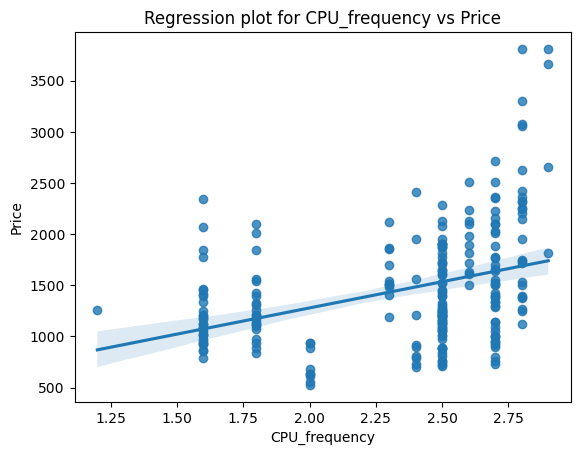

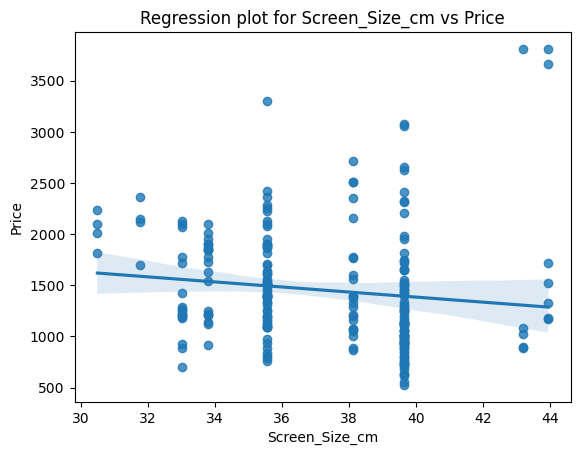

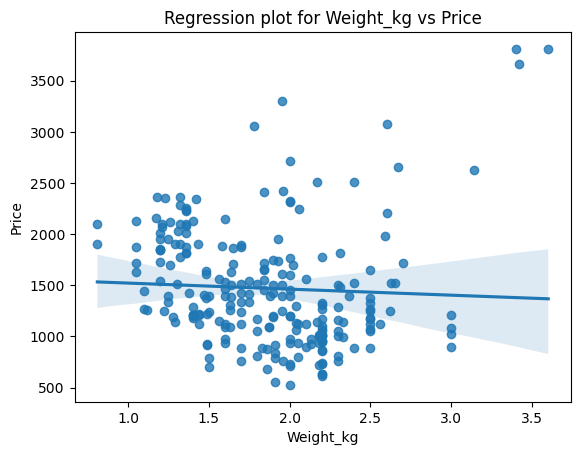

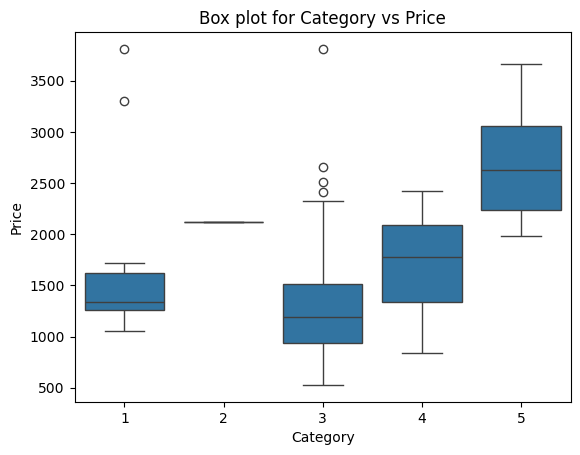

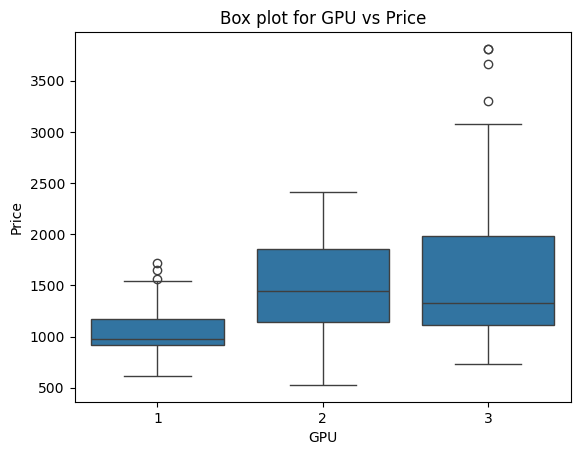

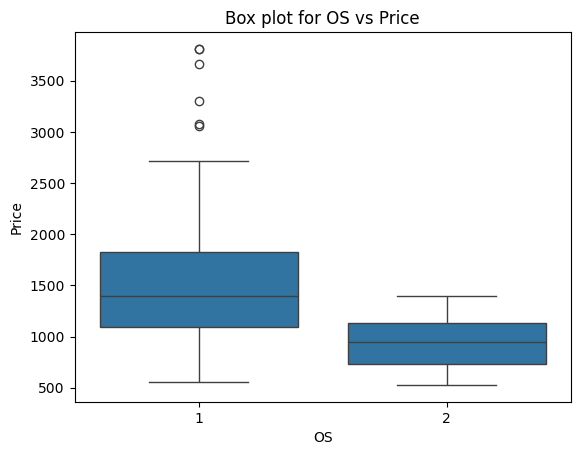

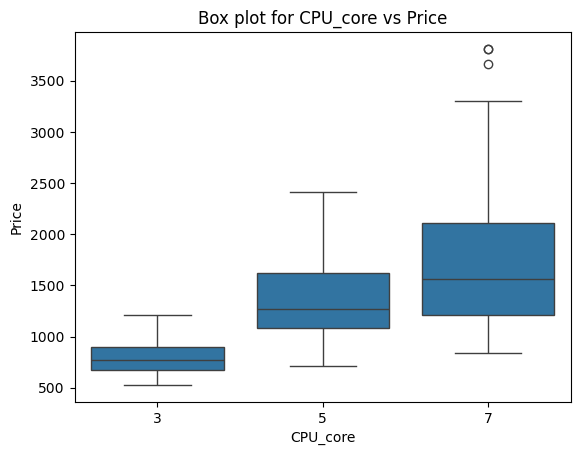

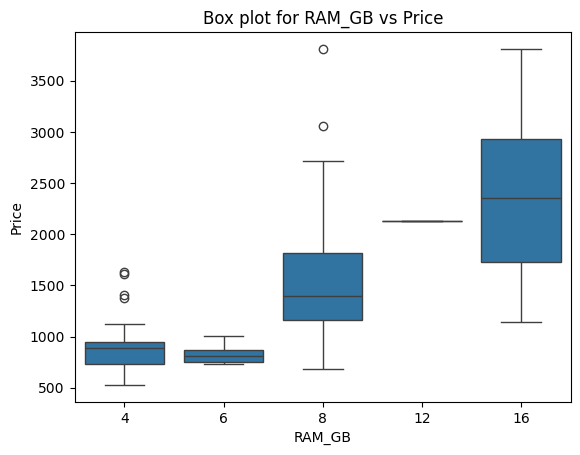

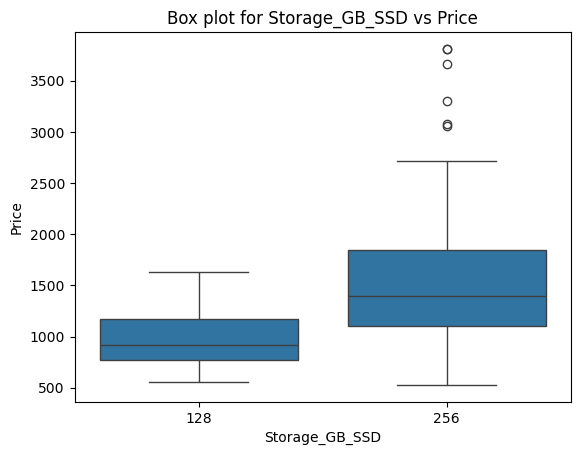

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 1. Create regression plots
data = pd.read_csv('dataset.csv')
regression_attributes = ['CPU_frequency', 'Screen_Size_cm', 'Weight_kg']
for attribute in regression_attributes:
    sns.regplot(x=attribute, y='Price', data=data)
    plt.title(f'Regression plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()
# 2. Create box plots
boxplot_attributes = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
for attribute in boxplot_attributes:
    sns.boxplot(x=attribute, y='Price', data=data)
    plt.title(f'Box plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

In [12]:
import pandas as pd
from scipy.stats import pearsonr

# Reading the dataset
df = pd.read_csv('dataset.csv')

# Extracting numerical attributes and the target variable "Price"
numerical_attributes = df.select_dtypes(include=['float64', 'int64']).columns
target = 'Price'

# Function to calculate correlation metrics
def calculate_correlation_stats(attribute):
    if attribute == target:
        return pd.Series(index=['Correlation', 'Pearson', 'P-value'], data=[None, None, None])
    corr, p_value = pearsonr(df[attribute], df[target])
    stats = pd.Series(index=['Correlation', 'Pearson', 'P-value'], data=[corr, corr, p_value])
    return stats

# Calculate and store correlation stats
correlation_stats = df[numerical_attributes].apply(calculate_correlation_stats)

# Print the results
print("Correlation and Pearson-related statistics for numerical attributes against 'Price':")
print(correlation_stats)

<class 'ValueError'>: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

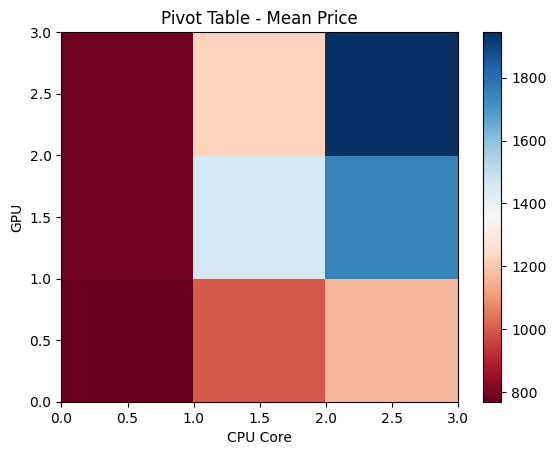

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
# Import the data set as a pandas DataFrame
df = pd.read_csv('dataset.csv')
# Group the attributes
grouped_data = df.groupby(['GPU', 'CPU_core'])['Price'].mean()
# Create a pivot table
pivot_table = pd.pivot_table(df, values='Price', index='GPU', columns='CPU_core', aggfunc='mean')
# Plot a pcolor plot
plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.title('Pivot Table - Mean Price')
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.show()

## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
